In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.io import wavfile
%matplotlib inline

In [3]:
%%bash
unzip Archive.zip

Archive:  Archive.zip
  inflating: cap.dat                 
  inflating: cap2.dat                


In [2]:
fname='cap.dat'

In [3]:
y=np.fromfile(fname, dtype='uint8') # read binary file

In [4]:
len(y)

50000000

In [5]:
y=y-127.5 # center signal (original data go from 0-255)

In [6]:
yc=y[::2]+y[1::2]*1j # write into complex form I+Q*j

In [7]:
len(yc) # number of data points in signal

25000000

In [8]:
srate=2.5e6 # sampling rate = bandwidth

What is the duration of the signal?

In [9]:
nf=5000 # selection of a few data points, equivalent to taking 0.002 s of signal
nf/srate

0.002

Text(0,0.5,'Amplitude')

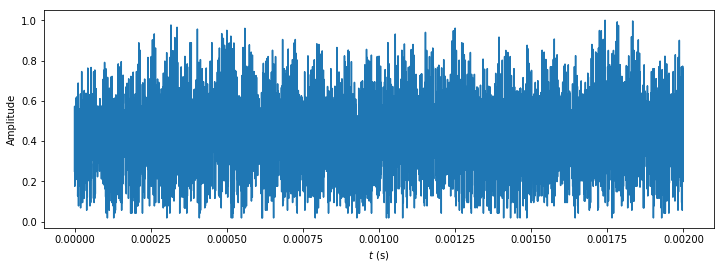

In [10]:
# signal plot for first 0.002 s
y=np.abs(yc[:nf])
plt.figure(figsize=(12,4))
plt.plot(np.arange(nf)/srate,y/y.max())
plt.xlabel(r'$t$ (s)')
plt.ylabel('Amplitude')

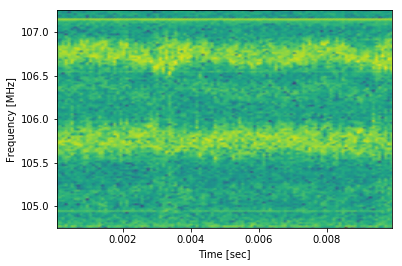

In [12]:
f0=106e6 # center frequency
f, t, Sxx = signal.spectrogram(abs(yc[:5*nf]), srate)
plt.pcolormesh(t, (2*f+f0-srate/2)/1e6, np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency [MHz]')
plt.xlabel('Time [sec]')
plt.show()

In [15]:
p=np.fft.fft(yc[:nf]) # fourier transform of (short) signal, yields freqs from 0 to BW

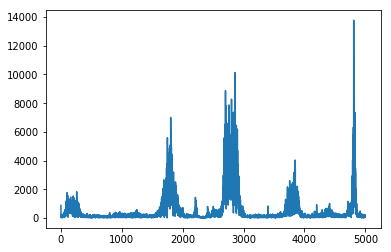

In [16]:
plt.plot(np.abs(p))